In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
%matplotlib inline 

In [30]:
data = pd.read_csv('E:/Advanced Data Analysis/revision/data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Exploratory data 

**A- check null value**

In [31]:
nan_counts = data.isna().sum()
nan_counts

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [32]:
number_nan = nan_counts - data.shape[0]
number_nan

Unnamed: 0       -18207
ID               -18207
Name             -18207
Age              -18207
Photo            -18207
                  ...  
GKHandling       -18159
GKKicking        -18159
GKPositioning    -18159
GKReflexes       -18159
Release Clause   -16643
Length: 89, dtype: int64

In [33]:
data.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [34]:
data_witout_GK = data.query( 'Position != "GK" ') 
data_witout_GK

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [35]:
Gk_data = data[data.Position =='GK']
Gk_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,18178,243158,L. Wahlstedt,18,https://cdn.sofifa.org/players/4/19/243158.png,Sweden,https://cdn.sofifa.org/flags/46.png,48,65,Dalkurd FF,...,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,€94K
18180,18180,221669,M. Hurst,22,https://cdn.sofifa.org/players/4/19/221669.png,Scotland,https://cdn.sofifa.org/flags/42.png,48,58,St. Johnstone FC,...,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,€78K
18183,18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,NaN
18194,18194,245862,J. Milli,18,https://cdn.sofifa.org/players/4/19/245862.png,Italy,https://cdn.sofifa.org/flags/27.png,47,65,Lecce,...,23.0,6.0,10.0,11.0,52.0,52.0,52.0,40.0,44.0,€109K


In [37]:
data.Wage = data.Wage.str[:-1]
data.Wage

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: Wage, Length: 18207, dtype: object

In [47]:
data.Wage = pd.to_numeric(data.Wage)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        17966 non-null float64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null f

In [81]:
best_wages = data.groupby(['Club'])['Wage'].sum()
best_wages = best_wages.sort_values()
# best_wages = best_wages[:-5] 
best_wages = 

Club
Sligo Rovers           19.0
Derry City             19.0
Limerick FC            19.0
Shamrock Rovers        22.0
Dalkurd FF             22.0
                      ...  
Juventus             3292.0
Manchester United    3391.0
Manchester City      3741.0
FC Barcelona         4837.0
Real Madrid          5017.0
Name: Wage, Length: 651, dtype: float64

(array([511.,  79.,  31.,  11.,   4.,   2.,   3.,   2.,   2.,   1.]),
 array([  19.,  342.,  665.,  988., 1311., 1634., 1957., 2280., 2603.,
        2926., 3249.]),
 <a list of 10 Patch objects>)

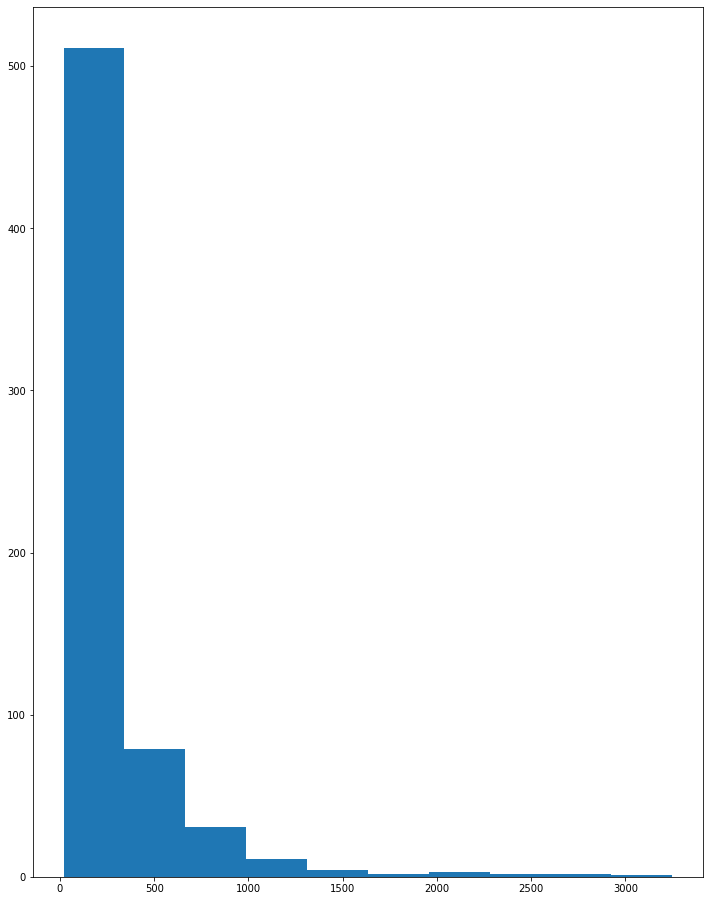

In [82]:
# plt.hist(best_wages[:-5])

# sb.countplot(data = data, y = 'Club' , color=base_color)

In [49]:
Prefedr_foot = data['Preferred Foot'].value_counts()
Prefedr_foot

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

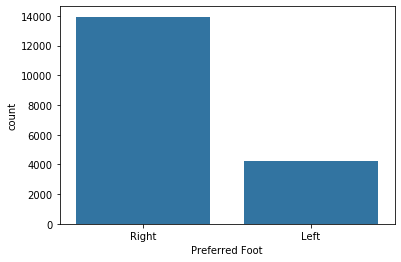

In [51]:
base_color = sb.color_palette()[0]
sb.countplot(data = data , x = 'Preferred Foot' , color=base_color , order = Prefedr_foot.index)

# Number of players in positions 

In [53]:
nu_postions = data.Position.value_counts()
nu_postions

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

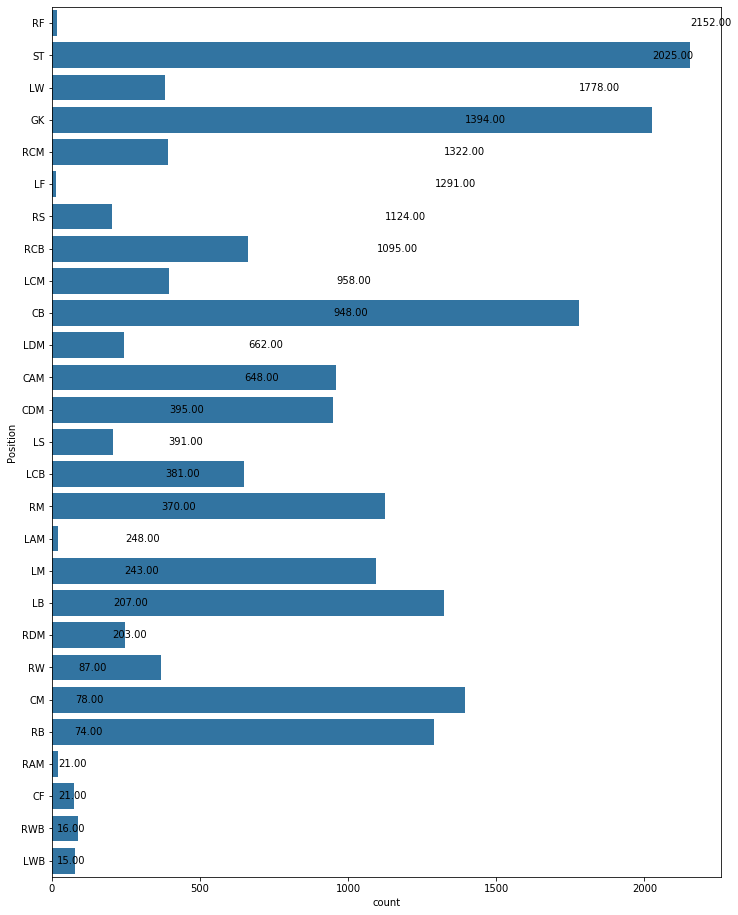

In [69]:
sb.countplot(data = data , y = 'Position' , color=base_color)

for i in range(nu_postions.shape[0]):
    count = nu_postions[i]
    
    pct_string = '{:0.2f}'.format(count)

    plt.text(count+1 , i , pct_string , va='center')

In [61]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,16

In [ ]:
n_data = nu_postions.sum()

max_type_count = 